In [1]:
# Libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import copy as cp
import importlib

import self_defined_functions as ft

In [3]:
df = pd.read_excel( 'ANOVA_df.xlsx' ) 

In [19]:
df = df[df['is_typhoon'] == False]
df = df[df['year'] < 2020]

In [20]:
df.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,False,False,National,False,元旦,2,end,False,National
2,2,2005-01-03,2005,1,3,0,298141,False,True,weekday,False,None,0,None,False,None
3,3,2005-01-04,2005,1,4,1,252051,False,True,weekday,False,None,0,None,False,None
4,4,2005-01-05,2005,1,5,2,263399,False,True,weekday,False,None,0,None,False,None


# Part 1 

In [36]:
df_1 = df[np.array( df['belong'] != 'None' ) & np.array( df['phase'] != 'None' )]

In [33]:
df_1.head()

,Unnamed: 0,date,year,month,day,weekday,trans_cnt,is_typhoon,is_working,day_type,is_foreign,holi_type,holi_len,phase,is_NYE,belong
0,0,2005-01-01,2005,1,1,5,382902,False,False,National,False,元旦,2,mid,False,National
1,1,2005-01-02,2005,1,2,6,412908,False,False,National,False,元旦,2,end,False,National
6,6,2005-01-07,2005,1,7,4,403391,False,True,weekday,False,None,0,start,False,weekend
7,7,2005-01-08,2005,1,8,5,408412,False,False,weekend,False,None,2,mid,False,weekend
8,8,2005-01-09,2005,1,9,6,452831,False,False,weekend,False,None,2,end,False,weekend


In [38]:
results = smf.ols('trans_cnt ~ C(belong) + C(phase) + C(belong):C(phase)', data=df_1).fit()
aov_14106_two = sms.anova_lm( results, typ=2 )

aov_14106_two

,sum_sq,df,F,PR(>F)
C(belong),6.946789e+11,2.0,30.979726,5.226145e-14
C(phase),6.235801e+11,2.0,27.809022,1.153292e-12
C(belong):C(phase),2.245632e+11,4.0,5.007281,5.100588e-04
Residual,2.662810e+13,2375.0,NaN,NaN


In [39]:
stats.shapiro( results.resid )

ShapiroResult(statistic=0.9734323024749756, pvalue=1.221356085124127e-20)

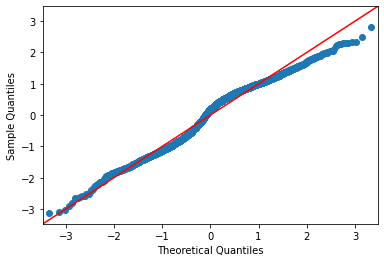

In [40]:
fig = sm.qqplot( results.resid, stats.norm, fit=True, line = '45' ) 

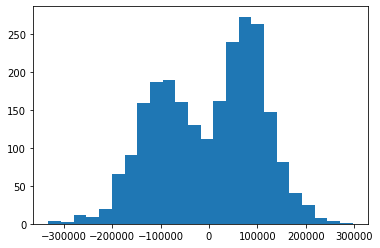

In [41]:
_ = plt.hist( results.resid, bins='auto' )

In [45]:
set( df_1['belong'] )

{'National', 'Traditional', 'weekend'}

In [64]:
# Set 
date_type_set = ['National', 'Traditional', 'weekend']
phase_set = ['start', 'mid', 'end']

In [65]:
y = {}
x = range( 3 )

In [66]:
for dtype in date_type_set : 
    y[dtype] = []
    for ptype in phase_set : 
        temp_df = df_1[np.array( df_1['phase'] == ptype ) & np.array( df_1['belong'] == dtype )]
        y[dtype].append( temp_df['trans_cnt'].mean() )

(300000.0, 700000.0)

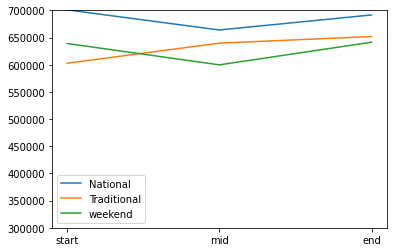

In [67]:
plt.plot( x, y['National'], label = 'National' )
plt.plot( x, y['Traditional'], label = 'Traditional' )
plt.plot( x, y['weekend'], label = 'weekend' )
plt.xticks( x, phase_set )
plt.legend()
plt.ylim( 300000, 700000 )

In [112]:
trCnt = []
for dtype in date_type_set : 
    trCnt.append( df_1[df_1['belong'] == dtype]['trans_cnt'] )

In [113]:
ft.kruskal( trCnt[0], trCnt[1], trCnt[2] )

1.0547118733938987e-13

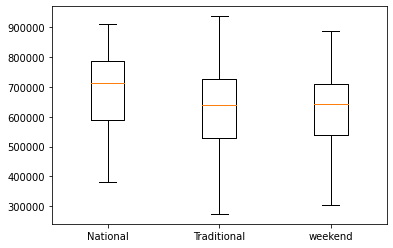

In [118]:
plt.boxplot( trCnt )
plt.xticks( range( 1, 4 ), date_type_set )
plt.show()